# Gender Classification

https://www.kaggle.com/datasets/hb20007/gender-classification

취향으로 남자인지 여자인지 맞춰보자. 

In [5]:
from glob import glob
import pandas as pd

for g in glob('./data/*'):
    print(g)
    
df = pd.read_csv('./data/gender_classification.csv')

display(df)

./data/gender_classification.csv


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [17]:
# 66명 밖에 안된다. 
# 이렇게 적은 데이터로 유의미한 분석은 어렵다.

print(df['Gender'].value_counts())



Gender
F    33
M    33
Name: count, dtype: int64


In [6]:
# favorite color를 one-hot encoding

df = pd.get_dummies(df, columns=['Favorite Color'])
display(df)

,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm
0,Rock,Vodka,7UP/Sprite,F,True,False,False
1,Hip hop,Vodka,Coca Cola/Pepsi,F,False,True,False
2,Rock,Wine,Coca Cola/Pepsi,F,False,False,True
3,Folk/Traditional,Whiskey,Fanta,F,False,False,True
4,Rock,Vodka,Coca Cola/Pepsi,F,True,False,False
...,...,...,...,...,...,...,...
61,Rock,Vodka,Coca Cola/Pepsi,M,True,False,False
62,Hip hop,Beer,Coca Cola/Pepsi,M,True,False,False
63,Hip hop,Doesn't drink,Fanta,M,False,True,False
64,Rock,Wine,Coca Cola/Pepsi,M,True,False,False


In [10]:
# favorite music genre를 one-hot encoding
# 그런데, favorite music genre는 여러개 선택 가능하므로, 이를 고려하여 one-hot encoding을 해야함

df['Favorite Music Genre list'] = df['Favorite Music Genre'].apply(lambda x: x.split('/'))
music_genre = set()
for i in df['Favorite Music Genre list']:
    music_genre.update(i)
print(music_genre)

for genre in music_genre:
    df['music_' + genre] = df['Favorite Music Genre list'].apply(lambda x: genre in x)
    
display(df)

{'Hip hop', 'Blues', 'Traditional', 'Rock', 'R&B and soul', 'Folk', 'Electronic', 'Jazz', 'Pop'}


,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre list,music_Hip hop,music_Blues,music_Traditional,music_Rock,music_R&B and soul,music_Folk,music_Electronic,music_Jazz,music_Pop
0,Rock,Vodka,7UP/Sprite,F,True,False,False,[Rock],False,False,False,True,False,False,False,False,False
1,Hip hop,Vodka,Coca Cola/Pepsi,F,False,True,False,[Hip hop],True,False,False,False,False,False,False,False,False
2,Rock,Wine,Coca Cola/Pepsi,F,False,False,True,[Rock],False,False,False,True,False,False,False,False,False
3,Folk/Traditional,Whiskey,Fanta,F,False,False,True,"[Folk, Traditional]",False,False,True,False,False,True,False,False,False
4,Rock,Vodka,Coca Cola/Pepsi,F,True,False,False,[Rock],False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Rock,Vodka,Coca Cola/Pepsi,M,True,False,False,[Rock],False,False,False,True,False,False,False,False,False
62,Hip hop,Beer,Coca Cola/Pepsi,M,True,False,False,[Hip hop],True,False,False,False,False,False,False,False,False
63,Hip hop,Doesn't drink,Fanta,M,False,True,False,[Hip hop],True,False,False,False,False,False,False,False,False
64,Rock,Wine,Coca Cola/Pepsi,M,True,False,False,[Rock],False,False,False,True,False,False,False,False,False


In [11]:
# favorite beverage를 one-hot encoding
df = pd.get_dummies(df, columns=['Favorite Beverage'])
display(df)


,Favorite Music Genre,Favorite Soft Drink,Gender,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre list,music_Hip hop,music_Blues,music_Traditional,...,music_Folk,music_Electronic,music_Jazz,music_Pop,Favorite Beverage_Beer,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine
0,Rock,7UP/Sprite,F,True,False,False,[Rock],False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,Hip hop,Coca Cola/Pepsi,F,False,True,False,[Hip hop],True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,Rock,Coca Cola/Pepsi,F,False,False,True,[Rock],False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,Folk/Traditional,Fanta,F,False,False,True,"[Folk, Traditional]",False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,Rock,Coca Cola/Pepsi,F,True,False,False,[Rock],False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Rock,Coca Cola/Pepsi,M,True,False,False,[Rock],False,False,False,...,False,False,False,False,False,False,False,True,False,False
62,Hip hop,Coca Cola/Pepsi,M,True,False,False,[Hip hop],True,False,False,...,False,False,False,False,True,False,False,False,False,False
63,Hip hop,Fanta,M,False,True,False,[Hip hop],True,False,False,...,False,False,False,False,False,True,False,False,False,False
64,Rock,Coca Cola/Pepsi,M,True,False,False,[Rock],False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [13]:
# favorite soft drink를 one-hot encoding
# 그런데, favorite soft drink는 여러개 선택 가능하므로, 이를 고려하여 one-hot encoding을 해야함

df['Favorite Soft Drink list'] = df['Favorite Soft Drink'].apply(lambda x: x.split('/'))
soft_drink = set()
for i in df['Favorite Soft Drink list']:
    soft_drink.update(i)
    
print(soft_drink)

for drink in soft_drink:
    df['soft_drink_' + drink] = df['Favorite Soft Drink list'].apply(lambda x: drink in x)

display(df)

{'Sprite', 'Coca Cola', 'Fanta', '7UP', 'Other', 'Pepsi'}


,Favorite Music Genre,Favorite Soft Drink,Gender,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre list,music_Hip hop,music_Blues,music_Traditional,...,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink list,soft_drink_Sprite,soft_drink_Coca Cola,soft_drink_Fanta,soft_drink_7UP,soft_drink_Other,soft_drink_Pepsi
0,Rock,7UP/Sprite,F,True,False,False,[Rock],False,False,False,...,True,False,False,"[7UP, Sprite]",True,False,False,True,False,False
1,Hip hop,Coca Cola/Pepsi,F,False,True,False,[Hip hop],True,False,False,...,True,False,False,"[Coca Cola, Pepsi]",False,True,False,False,False,True
2,Rock,Coca Cola/Pepsi,F,False,False,True,[Rock],False,False,False,...,False,False,True,"[Coca Cola, Pepsi]",False,True,False,False,False,True
3,Folk/Traditional,Fanta,F,False,False,True,"[Folk, Traditional]",False,False,True,...,False,True,False,[Fanta],False,False,True,False,False,False
4,Rock,Coca Cola/Pepsi,F,True,False,False,[Rock],False,False,False,...,True,False,False,"[Coca Cola, Pepsi]",False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Rock,Coca Cola/Pepsi,M,True,False,False,[Rock],False,False,False,...,True,False,False,"[Coca Cola, Pepsi]",False,True,False,False,False,True
62,Hip hop,Coca Cola/Pepsi,M,True,False,False,[Hip hop],True,False,False,...,False,False,False,"[Coca Cola, Pepsi]",False,True,False,False,False,True
63,Hip hop,Fanta,M,False,True,False,[Hip hop],True,False,False,...,False,False,False,[Fanta],False,False,True,False,False,False
64,Rock,Coca Cola/Pepsi,M,True,False,False,[Rock],False,False,False,...,False,False,True,"[Coca Cola, Pepsi]",False,True,False,False,False,True


In [15]:
df_features = df.drop(['Favorite Music Genre', 'Favorite Soft Drink', 'Favorite Music Genre list', 'Favorite Soft Drink list'], axis=1)
display(df_features)

,Gender,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,music_Hip hop,music_Blues,music_Traditional,music_Rock,music_R&B and soul,music_Folk,...,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,soft_drink_Sprite,soft_drink_Coca Cola,soft_drink_Fanta,soft_drink_7UP,soft_drink_Other,soft_drink_Pepsi
0,F,True,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
1,F,False,True,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2,F,False,False,True,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
3,F,False,False,True,False,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,False
4,F,True,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,M,True,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
62,M,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
63,M,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
64,M,True,False,False,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True


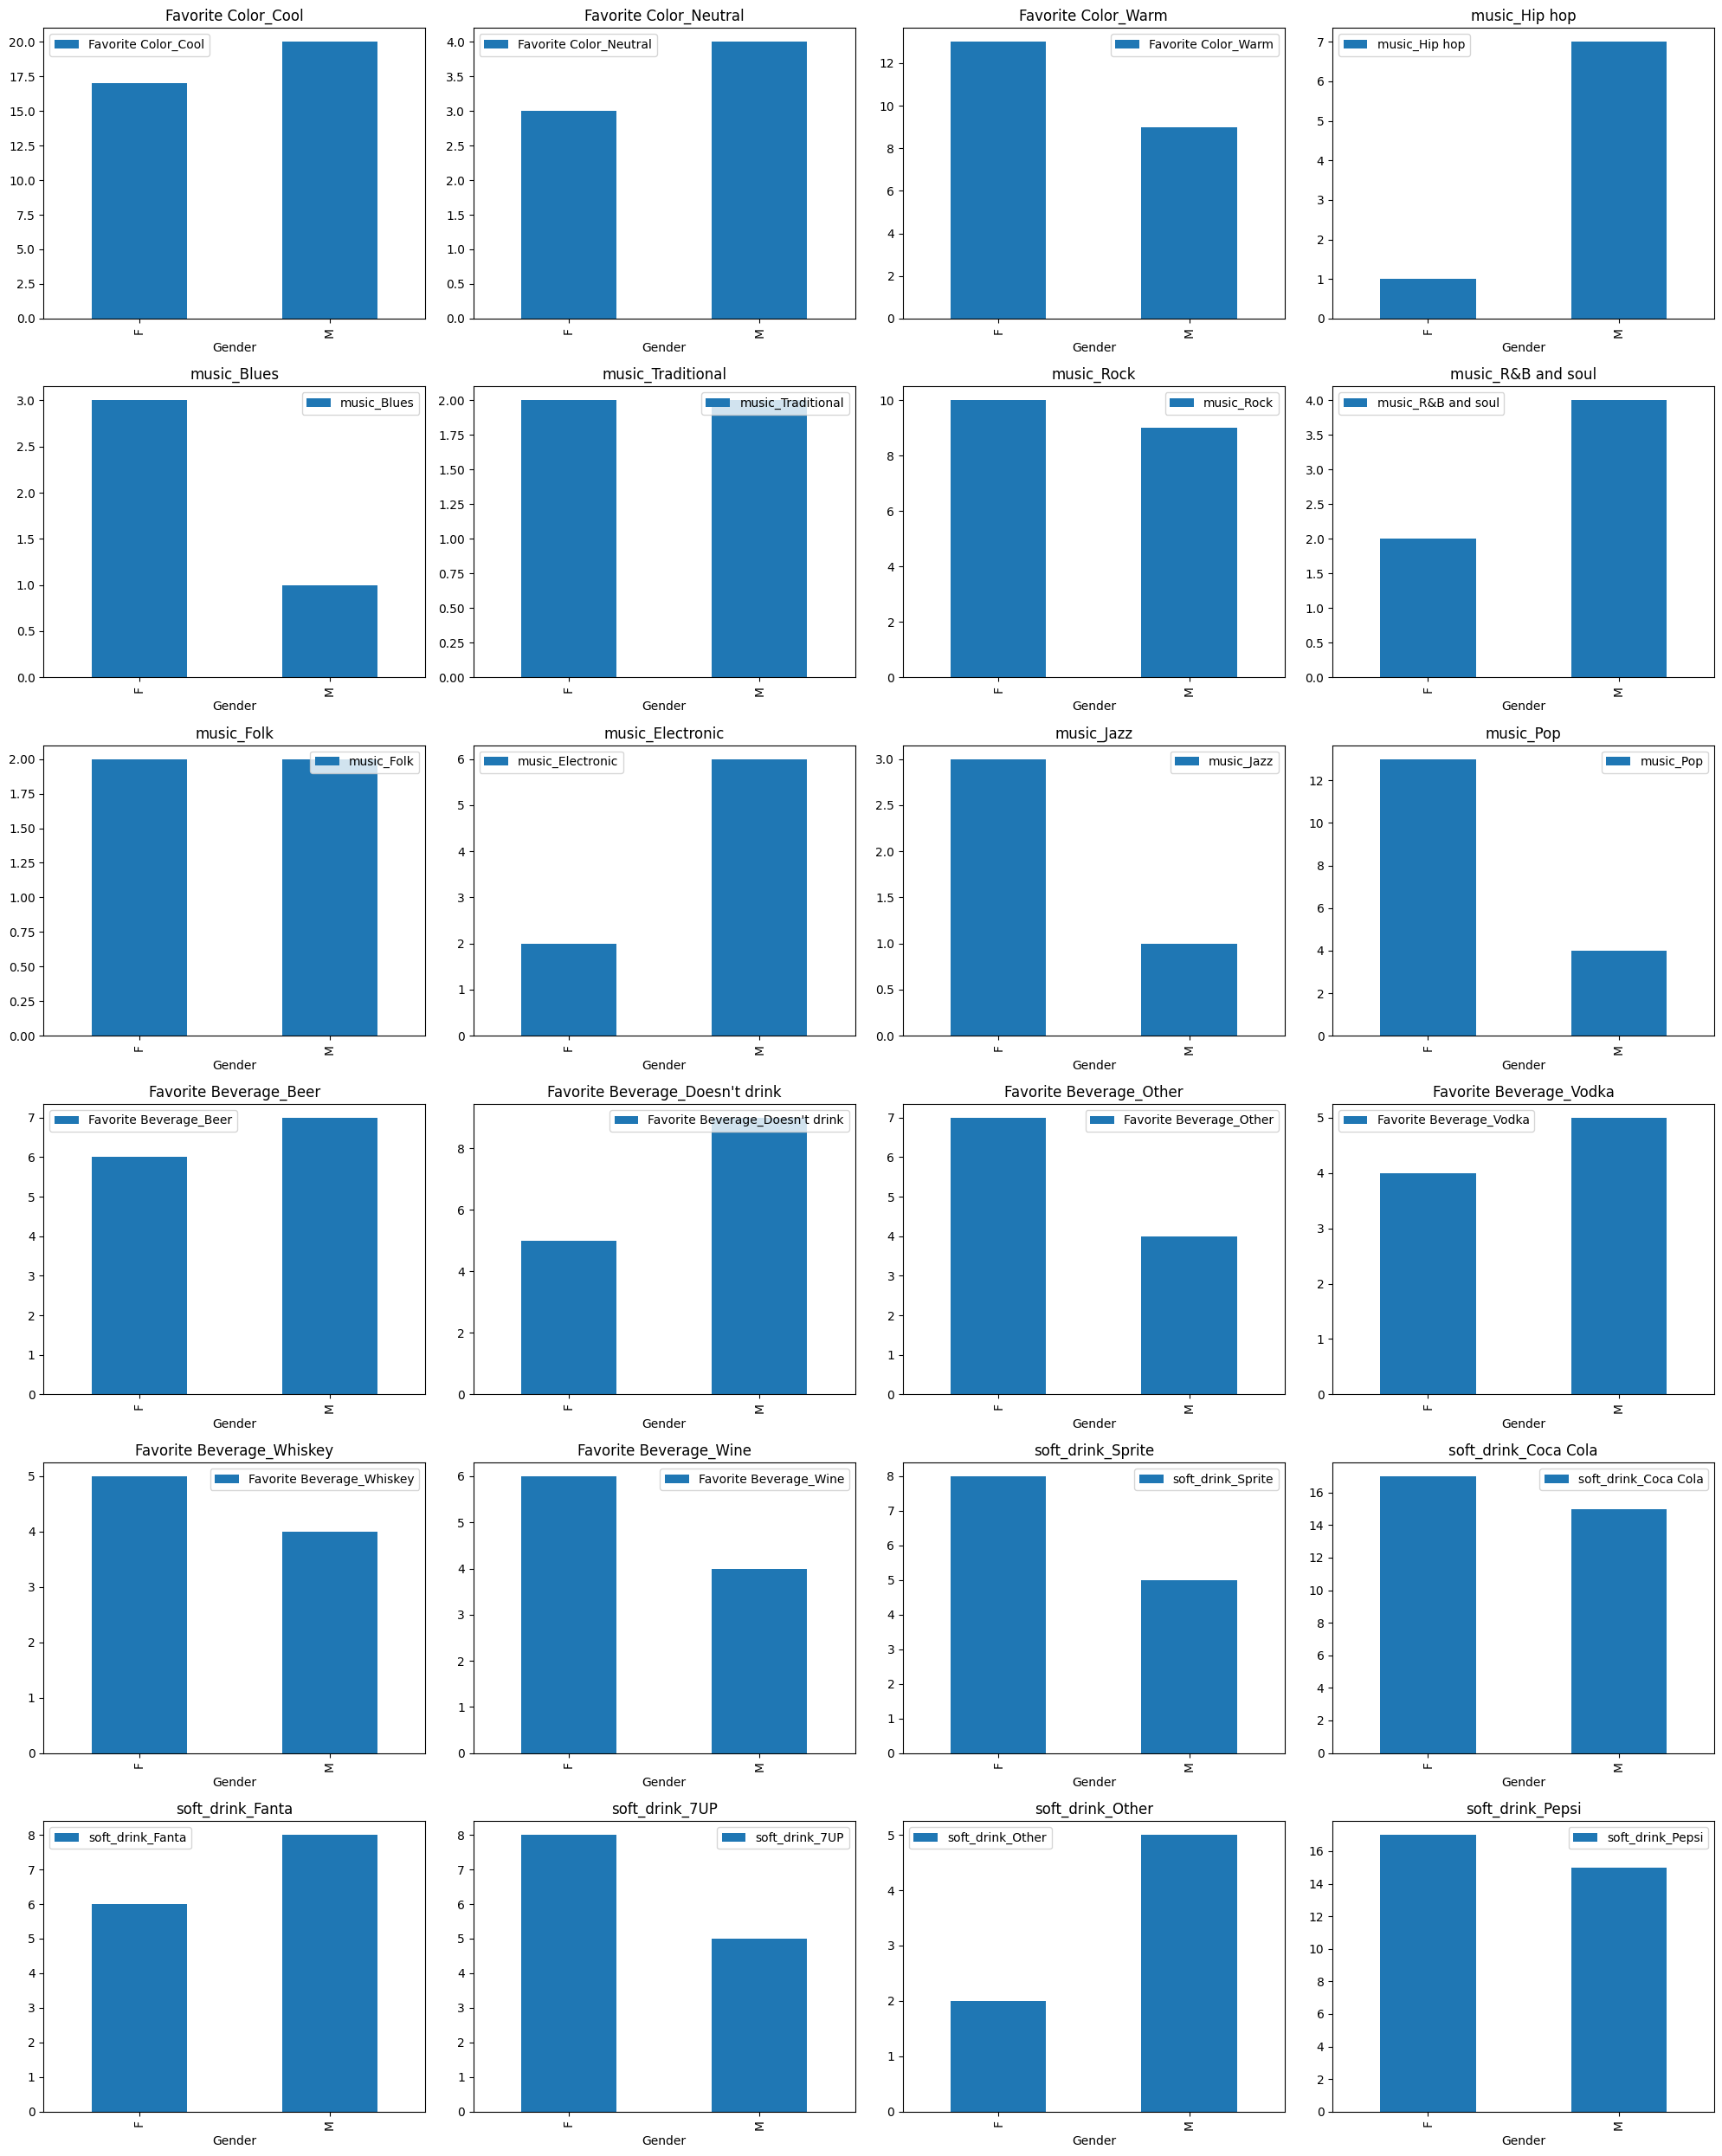

In [23]:
# 각 feature 별로 성별 분포를 차트로 그려보자   

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))

for i, col in enumerate(df_features.columns[1:]):
    plt.subplot(6, 4, i+1)
    # 성별별로 count를 세어서 bar chart로 그린다.
    # 남자는 파란색으로 여자는 빨간색으로 그린다. 
    df_features.groupby('Gender').agg({col: 'sum'}).plot(kind='bar', ax=plt.gca())
    plt.title(col)
    
plt.tight_layout()
plt.show()
    
    
    
    

In [24]:
from sklearn.model_selection import train_test_split

df_target = df_features['Gender']
df_features = df_features.drop(columns=['Gender'])

display(df_target)
display(df_features)

0     F
1     F
2     F
3     F
4     F
     ..
61    M
62    M
63    M
64    M
65    M
Name: Gender, Length: 66, dtype: object

,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,music_Hip hop,music_Blues,music_Traditional,music_Rock,music_R&B and soul,music_Folk,music_Electronic,...,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,soft_drink_Sprite,soft_drink_Coca Cola,soft_drink_Fanta,soft_drink_7UP,soft_drink_Other,soft_drink_Pepsi
0,True,False,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
3,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,True,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
62,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
63,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
64,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42, stratify=df_target)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(y_train.value_counts(), y_train.value_counts() / y_train.shape[0] * 100)
print(y_test.value_counts(), y_test.value_counts() / y_test.shape[0] * 100)

(52, 24) (14, 24) (52,) (14,)
Gender
M    26
F    26
Name: count, dtype: int64 Gender
M    50.0
F    50.0
Name: count, dtype: float64
Gender
F    7
M    7
Name: count, dtype: int64 Gender
F    50.0
M    50.0
Name: count, dtype: float64


In [26]:
# 걍 다 넣고 해보자. KNN으로

from sklearn.neighbors import KNeighborsClassifier

knn_all = KNeighborsClassifier(n_neighbors=5)
knn_all.fit(X_train, y_train)

print(knn_all.score(X_train, y_train))


0.7115384615384616


In [27]:
print(knn_all.score(X_test, y_test))

0.5714285714285714


In [30]:
# 데이터가 적어서 그런지 성능이 형편없다. 
# 다른 모델로 해보자.

from sklearn.ensemble import RandomForestClassifier

rf_all = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all.fit(X_train, y_train)
rf_all.score(X_train, y_train)

0.9423076923076923

In [31]:
rf_all.score(X_test, y_test)

0.6428571428571429

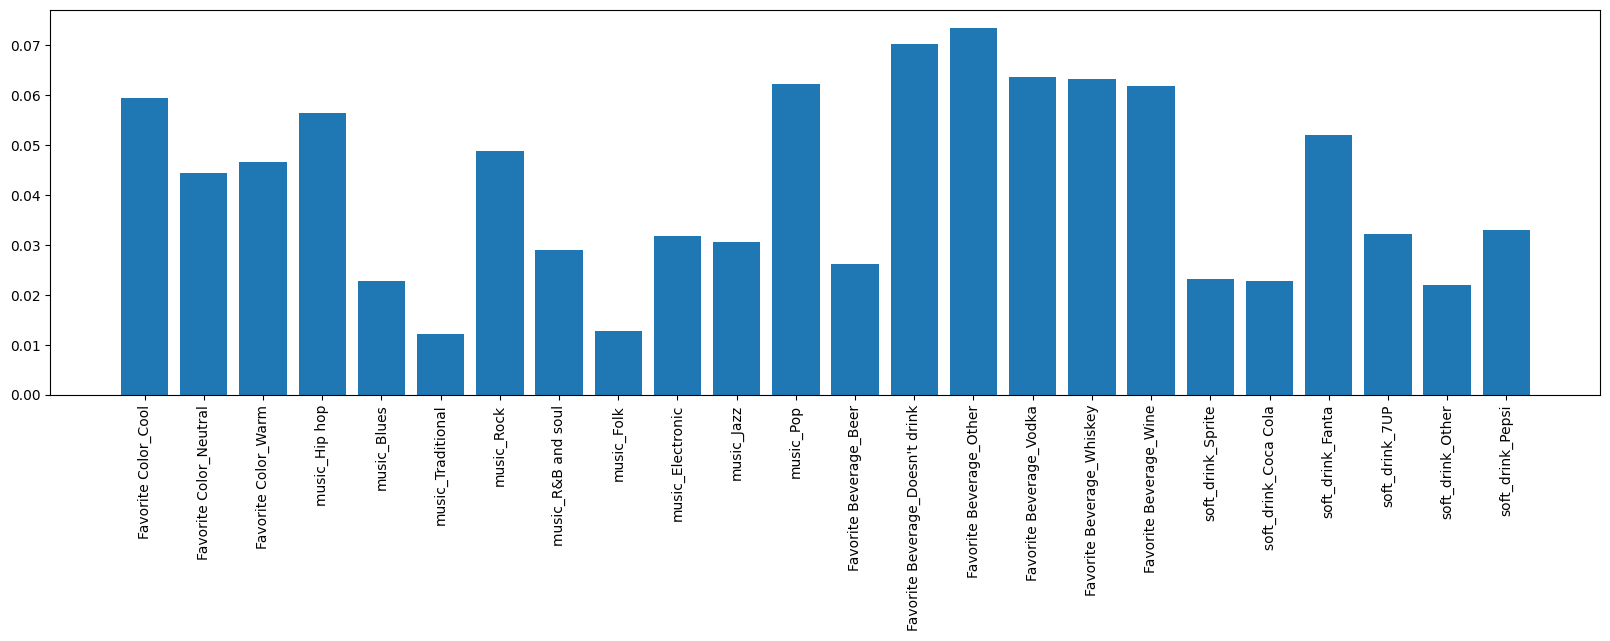

In [33]:
# feature 중요도를 확인해보자

import numpy as np

plt.figure(figsize=(20, 5))
plt.bar(X_train.columns, rf_all.feature_importances_)
plt.xticks(rotation=90)
plt.show()


In [34]:
# feature selection을 해보자.

from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf_all, threshold=0.05)
sfm.fit(X_train, y_train)

X_train_sfm = sfm.transform(X_train)
X_test_sfm = sfm.transform(X_test)

print(X_train_sfm.shape, X_test_sfm.shape)

rf_sfm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sfm.fit(X_train_sfm, y_train)

print(rf_sfm.score(X_train_sfm, y_train))
print(rf_sfm.score(X_test_sfm, y_test))

(52, 9) (14, 9)
0.9038461538461539
0.6428571428571429


# 결론: 
데이터가 적으면 맞출 수가 없다!